In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import cvs file (easy_visa_cleaned_NoOutliers.csv)
easy_visa_original_data_df = pd.read_csv('easy_visa_cleaned_NoOutliers.csv')
easy_visa_original_data_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
1,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
2,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
3,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
4,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [3]:
# creates a completely independent copy of the original DataFrame
easy_visa_df = easy_visa_original_data_df.copy()

In [4]:
# Removing the "case_id" and "unit_of_wage" column from the DataFrame and prints the first 10 rows of the resulting DataFrame

easy_visa_df=easy_visa_df.drop(["case_id"], axis=1)
easy_visa_df=easy_visa_df.drop(["unit_of_wage"], axis=1)
easy_visa_df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
0,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Y,Certified
1,Africa,Master's,Y,N,1082,2005,South,149907.39,Y,Certified
2,Asia,Master's,Y,N,2339,2012,South,78252.14,Y,Certified
3,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Y,Certified
4,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Y,Certified
5,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Y,Certified
6,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Y,Certified
7,Asia,High School,Y,N,4069,2005,Northeast,70813.09,Y,Denied
8,Asia,Bachelor's,Y,N,1652,2007,Midwest,107196.03,Y,Certified
9,Asia,High School,Y,N,4897,1987,West,74108.02,Y,Denied


In [5]:
# understanding the structure of the DataFrame, identifying data types, and assessing data completeness. 

easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              18430 non-null  object 
 1   education_of_employee  18430 non-null  object 
 2   has_job_experience     18430 non-null  object 
 3   requires_job_training  18430 non-null  object 
 4   no_of_employees        18430 non-null  int64  
 5   yr_of_estab            18430 non-null  int64  
 6   region_of_employment   18430 non-null  object 
 7   prevailing_wage        18430 non-null  float64
 8   full_time_position     18430 non-null  object 
 9   case_status            18430 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


In [6]:
# Generate a summary of statistics for the DataFrame easy_visa_df, including both numeric and non-numeric columns.

easy_visa_df.describe(include='all')

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
count,18430,18430,18430,18430,18430.000000,18430.000000,18430,18430.000000,18430,18430
unique,6,4,2,2,NaN,NaN,5,NaN,2,2
top,Asia,Bachelor's,Y,N,NaN,NaN,South,NaN,Y,Certified
freq,12366,7406,11032,16169,NaN,NaN,5006,NaN,16376,12840
mean,NaN,NaN,NaN,NaN,2223.555833,1994.329951,NaN,77813.302024,NaN,NaN
std,NaN,NaN,NaN,NaN,1504.850983,16.279233,NaN,44402.797942,NaN,NaN
min,NaN,NaN,NaN,NaN,11.000000,1936.000000,NaN,104.170000,NaN,NaN
25%,NaN,NaN,NaN,NaN,971.000000,1987.000000,NaN,43050.517500,NaN,NaN
50%,NaN,NaN,NaN,NaN,1989.000000,1999.000000,NaN,74635.865000,NaN,NaN
75%,NaN,NaN,NaN,NaN,3266.000000,2006.000000,NaN,109132.965000,NaN,NaN


In [7]:
#  count the number of unique values in each column of a DataFrame named easy_visa_df

get_unique_counts = easy_visa_df.columns.tolist()
easy_visa_df[get_unique_counts].nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           5368
yr_of_estab                 81
region_of_employment         5
prevailing_wage          18420
full_time_position           2
case_status                  2
dtype: int64

In [8]:
#checking unique value counts for each categorical columns in the entry table
categorical_columns = list(easy_visa_df.select_dtypes("object").columns)

for entry_column in categorical_columns:
    unique_count=easy_visa_df[entry_column].value_counts()
    print(unique_count)
    print("\n*************************************\n")

Asia             12366
Europe            2844
North America     2171
South America      526
Africa             394
Oceania            129
Name: continent, dtype: int64

*************************************

Bachelor's     7406
Master's       6981
High School    2389
Doctorate      1654
Name: education_of_employee, dtype: int64

*************************************

Y    11032
N     7398
Name: has_job_experience, dtype: int64

*************************************

N    16169
Y     2261
Name: requires_job_training, dtype: int64

*************************************

South        5006
Northeast    4994
West         4869
Midwest      3292
Island        269
Name: region_of_employment, dtype: int64

*************************************

Y    16376
N     2054
Name: full_time_position, dtype: int64

*************************************

Certified    12840
Denied        5590
Name: case_status, dtype: int64

*************************************



In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
columns_to_convert = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'full_time_position', 'case_status']
easy_visa_df = pd.get_dummies(easy_visa_df, columns=columns_to_convert)
easy_visa_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,...,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
0,2412,2002,83425.65,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1082,2005,149907.39,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,2339,2012,78252.14,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,4985,1994,53635.39,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,4810,2012,74362.19,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [10]:
# Removes the "case_status_Denied" column from "easy_visa_df" and then displays the first few rows of the modified DataFrame.
easy_visa_df=easy_visa_df.drop(columns=["case_status_Denied"])
easy_visa_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,...,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified
0,2412,2002,83425.65,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1082,2005,149907.39,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,2339,2012,78252.14,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,4985,1994,53635.39,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1
4,4810,2012,74362.19,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1


In [11]:
# understanding the structure of the DataFrame, identifying data types, and assessing data completeness.
easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    18430 non-null  int64  
 1   yr_of_estab                        18430 non-null  int64  
 2   prevailing_wage                    18430 non-null  float64
 3   continent_Africa                   18430 non-null  uint8  
 4   continent_Asia                     18430 non-null  uint8  
 5   continent_Europe                   18430 non-null  uint8  
 6   continent_North America            18430 non-null  uint8  
 7   continent_Oceania                  18430 non-null  uint8  
 8   continent_South America            18430 non-null  uint8  
 9   education_of_employee_Bachelor's   18430 non-null  uint8  
 10  education_of_employee_Doctorate    18430 non-null  uint8  
 11  education_of_employee_High School  18430 non-null  uin

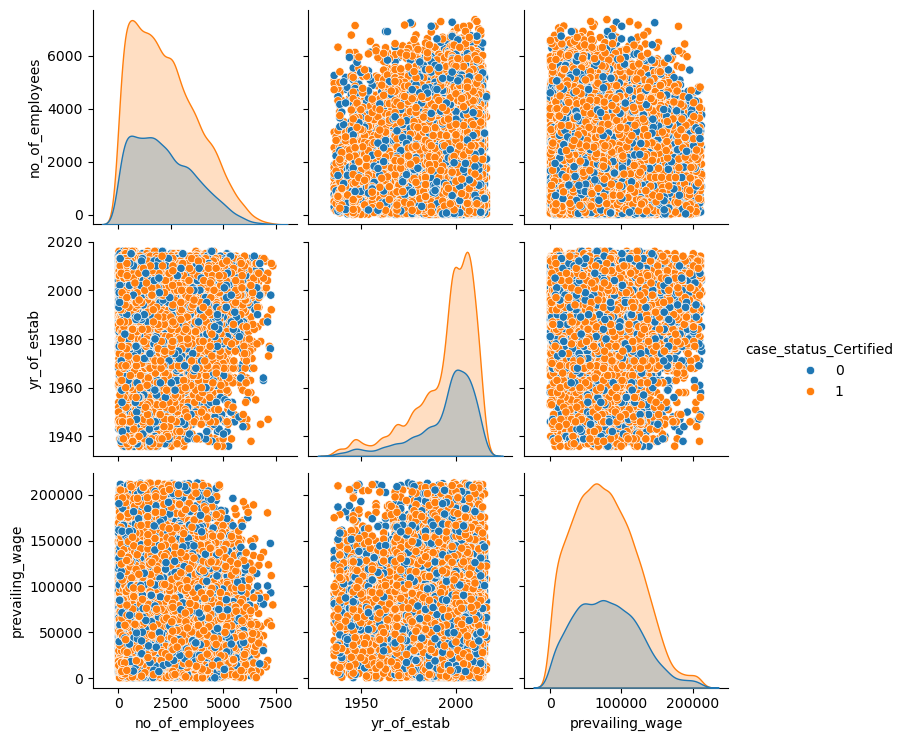

In [12]:
# visually explore the relationships and patterns in the data, especially in the context of certified and non-certified case statuses.

sns.pairplot(data=easy_visa_df, hue='case_status_Certified', vars=['no_of_employees', 'yr_of_estab', 'prevailing_wage'])
plt.show()

In [13]:
# Split our preprocessed data into our features and target arrays

y = easy_visa_df["case_status_Certified"]
X = easy_visa_df.drop(columns=["case_status_Certified"]).values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [15]:
# Evaluate the performance of a machine learning model on a test dataset. 
# Make predictions on the test dataset (X_test).
y_pred = model.predict(X_test)

# Calculate the accuracy of the model's predictions.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#  Prints a classification report & prints the confusion matrix for the model's predictions.
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7074652777777778
              precision    recall  f1-score   support

           0       0.53      0.31      0.39      1398
           1       0.75      0.88      0.81      3210

    accuracy                           0.71      4608
   macro avg       0.64      0.60      0.60      4608
weighted avg       0.68      0.71      0.68      4608

Confusion Matrix:
 [[ 435  963]
 [ 385 2825]]


Question: How well does the logistic regression model predict both the 0 (case_status_denied) and 1 (case_status_certified)?

Answer:Model's accuracy is approximately 70.75%, meaning it correctly predicted the class of roughly 70.75% of the total data points.
The logistic regression model performs relatively well in predicting class 1 (case_status_certified) with high precision, recall, and F1-score. However, its performance in predicting class 0 (case_status_denied) is less impressive, with lower precision, recall, and F1-score. This suggests that the model is better at identifying certified cases but struggles with denied cases.